Dataset : Wholesale Customers Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [8]:
df=pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
df.shape

(440, 8)

In [10]:
print("Missing values:")
df.isnull().sum()

Missing values:


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

1. K-Means Clustering for Customer Segmentation
Task: Use K-Means clustering to segment customers in the Wholesale Customers dataset based on their annual spending in different categories. Visualize the clusters.

In [11]:
# Selecting the relevant features for clustering
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [ ]:
# Apply K-Means with a specified number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

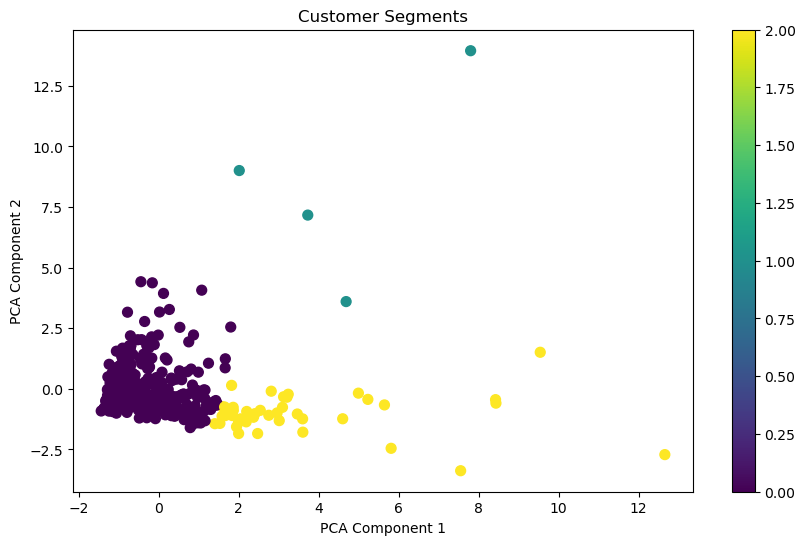

In [13]:
# Reduce the data to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

2. Evaluating the Optimal Number of Clusters
Task: Determine the optimal number of clusters for the Wholesale Customers dataset using the Elbow Method and Silhouette Score. Visualize the results and justify your choice.

In [ ]:
# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

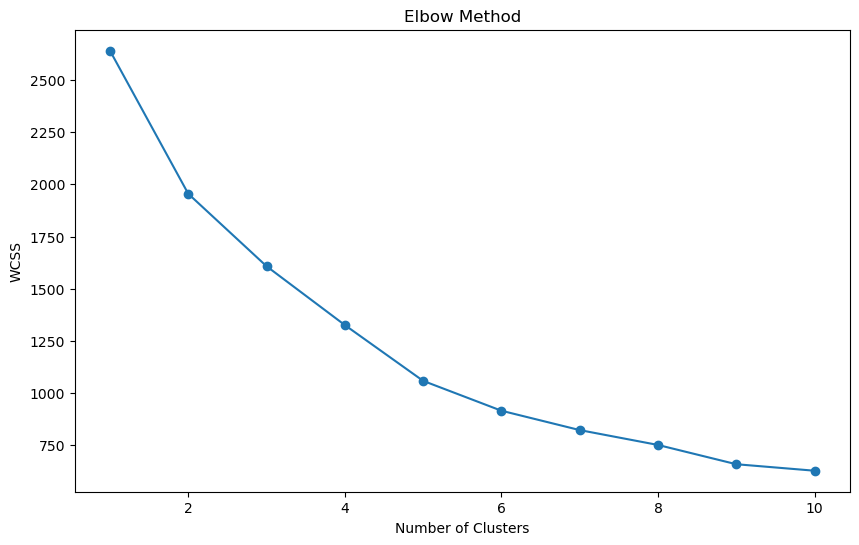

In [15]:
# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Calculate Silhouette Scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))

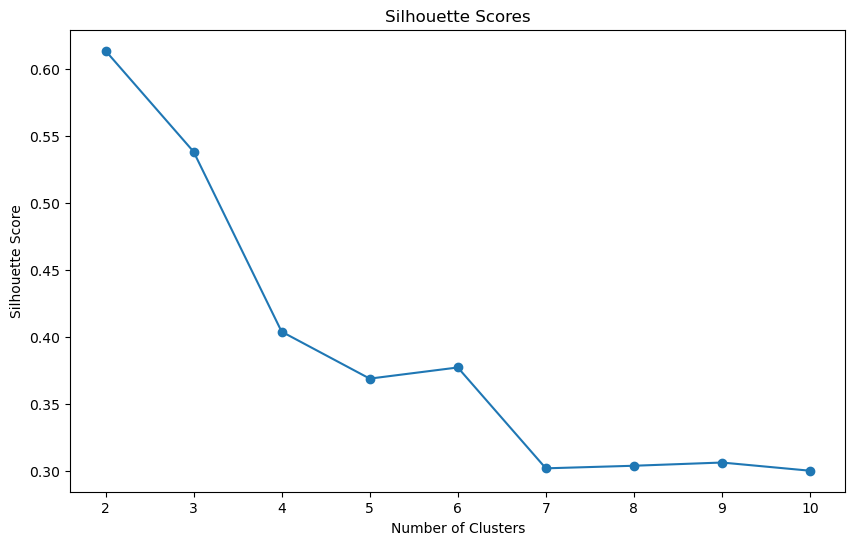

In [17]:
# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

3. Cluster Analysis and Interpretation
Task: Interpret the clusters formed in the Wholesale Customers dataset. Identify the characteristics and differences among the clusters based on spending behavior.

In [18]:
# Selecting the relevant features 
features = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [20]:
# Inverse the scaling to interpret cluster centers in the original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame for cluster centers with the correct column names
cluster_df = pd.DataFrame(cluster_centers, columns=features.columns)
cluster_df['Cluster'] = range(1, 4)
print(cluster_df)

          Fresh          Milk       Grocery        Frozen  Detergents_Paper  \
0  12062.913486   4115.099237   5534.966921   2940.676845       1696.170483   
1  52022.000000  31696.000000  18490.750000  29825.500000       2699.000000   
2   7705.069767  18752.069767  29054.813953   1782.837209      13731.767442   

     Delicassen  Cluster  
0   1299.114504        1  
1  19656.250000        2  
2   1901.534884        3  


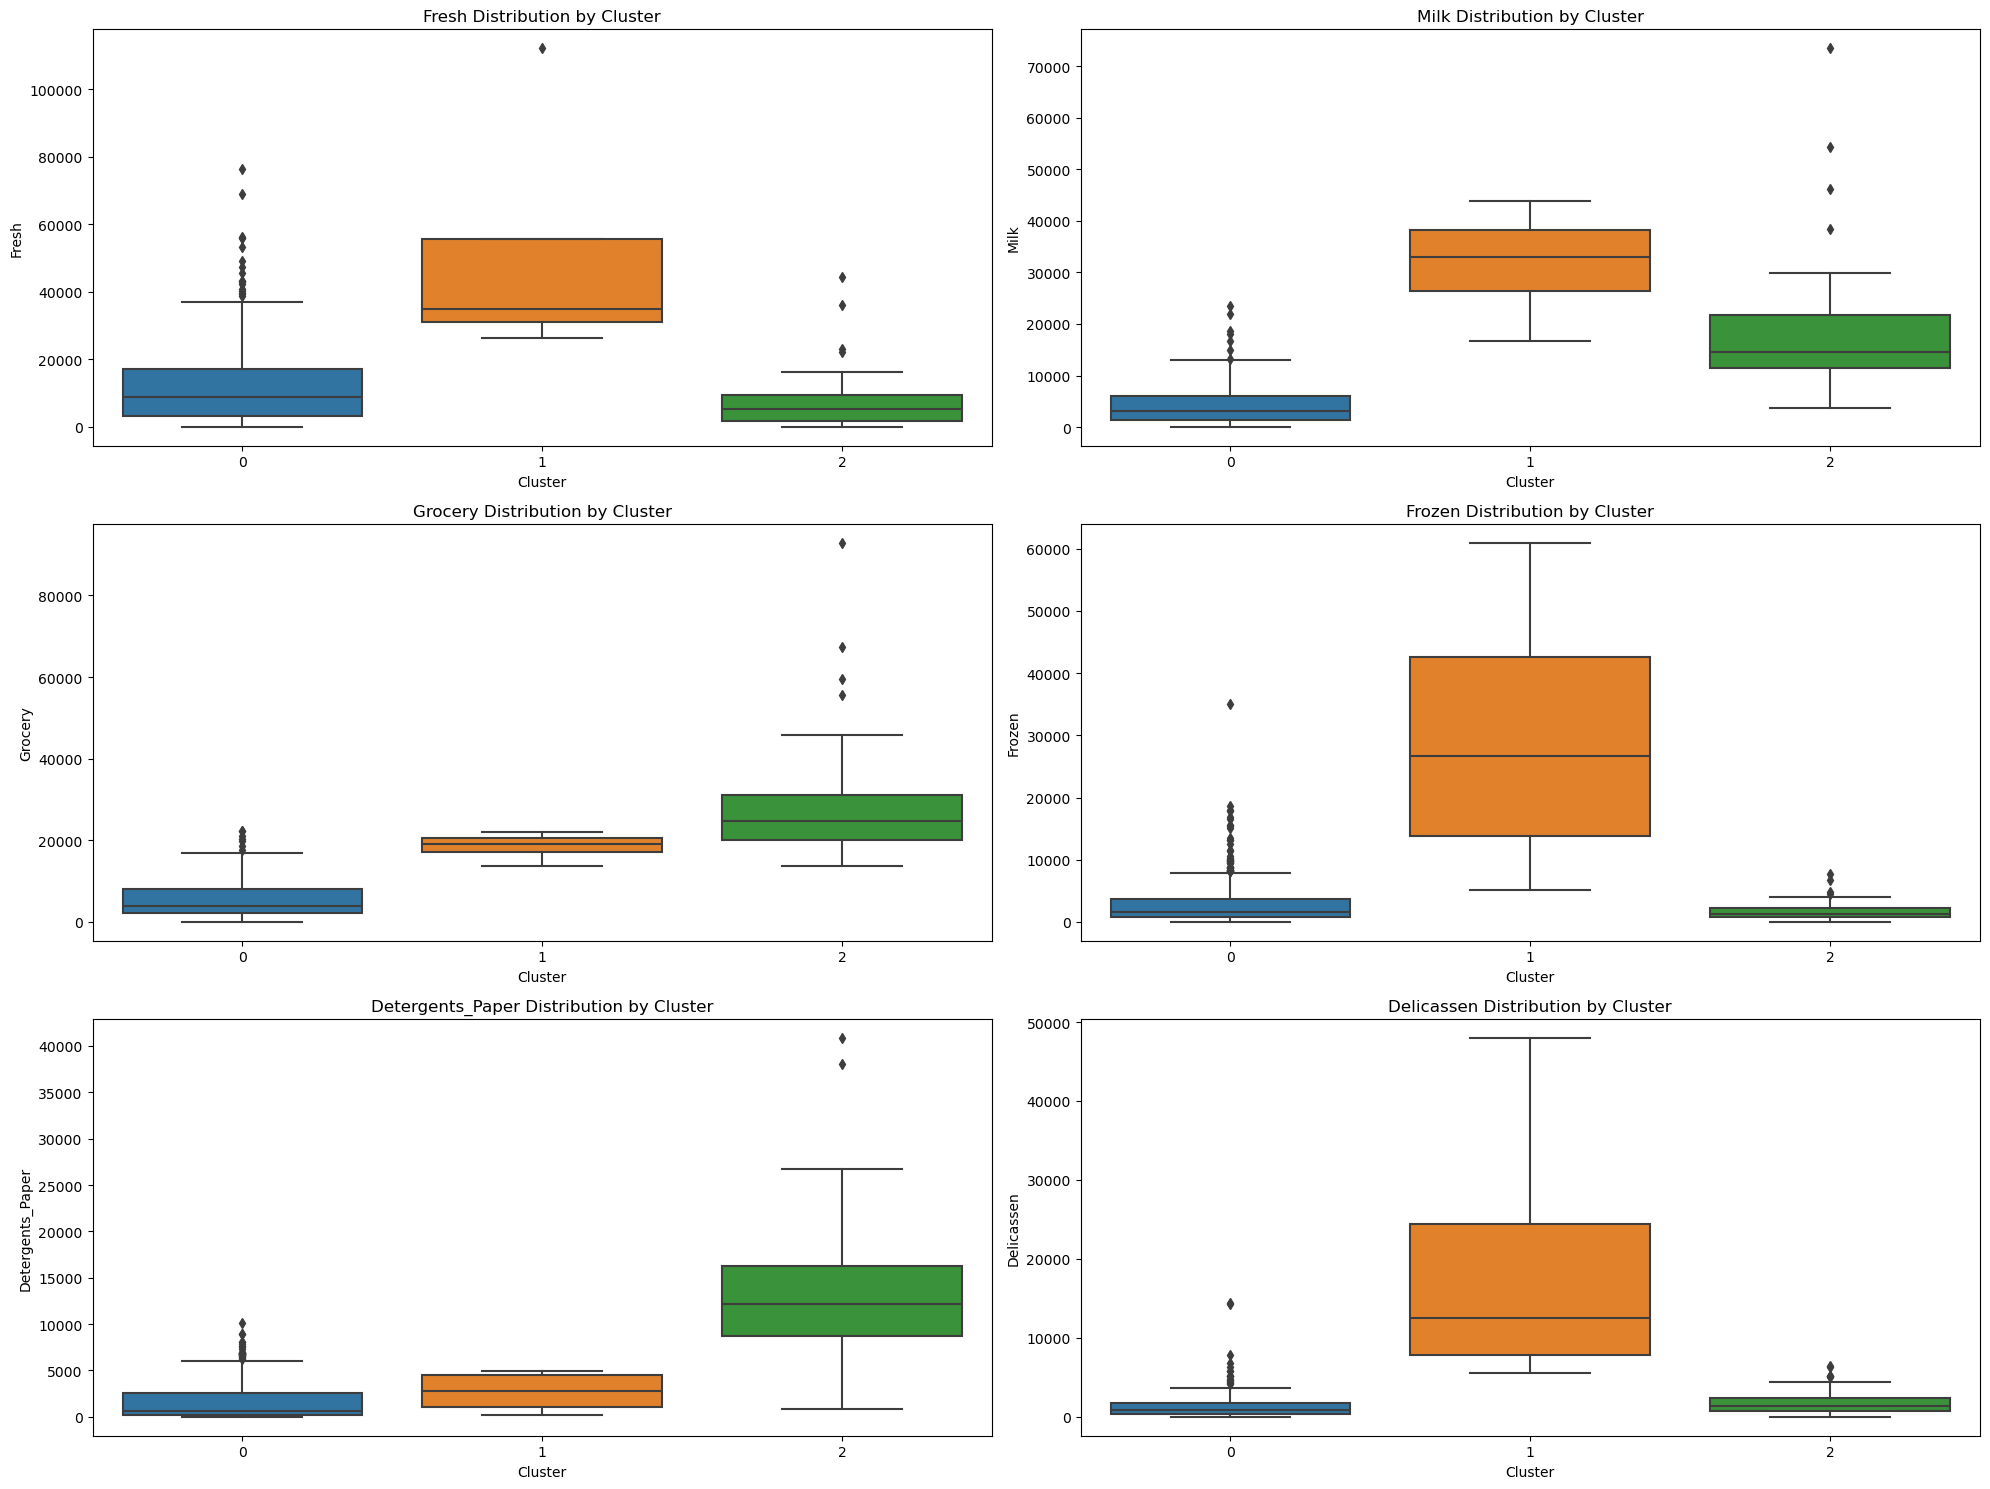

In [21]:
# Visualize the distribution of features for each cluster
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} Distribution by Cluster')
plt.tight_layout()
plt.show()

4. Hierarchical Clustering: Dendrogram and Cluster Formation
Task: Apply hierarchical clustering to the Wholesale Customers dataset and visualize the dendrogram. Compare the cluster assignments with those obtained from K-Means.

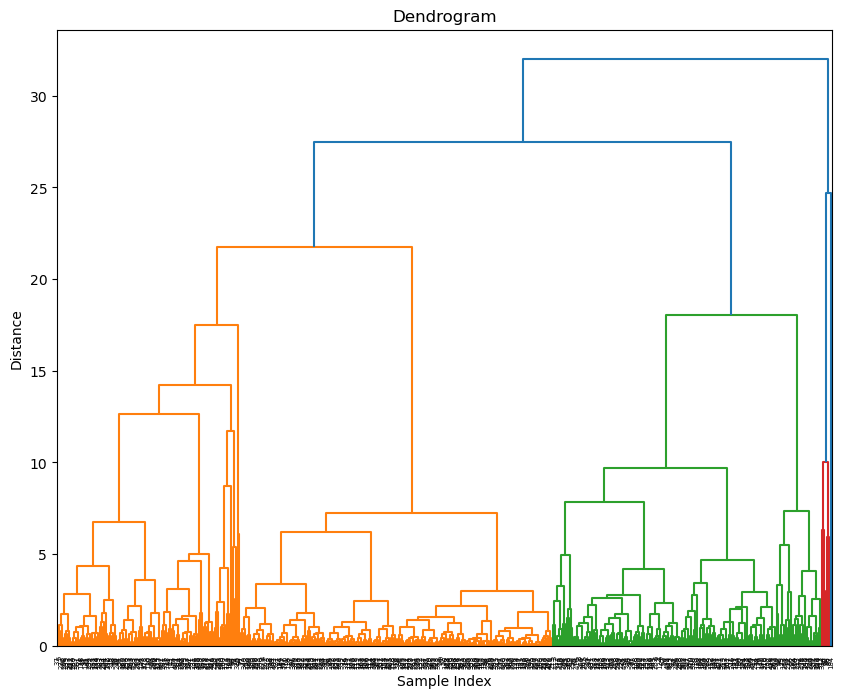

In [22]:
# Perform hierarchical clustering
linked = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linked, orientation='top', labels=range(1, len(scaled_features) + 1), distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [25]:
# Decide on the number of clusters (e.g., 3)
n_clusters = 3

# Assign cluster labels
df['H_Cluster'] = fcluster(linked, n_clusters, criterion='maxclust')

In [26]:
# Perform K-Means clustering (assuming 3 clusters)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Compare cluster assignments
comparison = pd.crosstab(df['H_Cluster'], df['KMeans_Cluster'])
print(comparison)

D:\softwares\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\softwares\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans_Cluster    0  1   2
H_Cluster                 
1                 0  1   5
2               115  0  38
3               278  3   0


5. Comparison of Clustering Results
Task: Compare the effectiveness of K-Means and hierarchical clustering on the Wholesale Customers dataset. Discuss the results in terms of cluster cohesion and separation.

K-Means: In K-Means clustering, the silhouette score typically reflects how closely grouped the data points are around their respective centroids. A higher silhouette score suggests stronger cohesion within clusters and clearer separation between them.

Hierarchical Clustering: For hierarchical clustering, the silhouette score indicates how effectively the algorithm groups similar points according to the hierarchical structure. While hierarchical clustering may not always yield as high a silhouette score as K-Means, it doesn't focus on optimizing cohesion around centroids.